In [2]:
import numpy as np
import pandas as pd
from fastai2.collab import *

In [3]:
ratings = pd.read_csv('train.csv')
ratings.overall = ratings.overall.astype('int32')

In [4]:
ratings = ratings[['userid','itemid','overall','unixReviewTime']]
ratings.columns = ['user','item','rating','timestamp']

In [5]:
ratings.head()

,user,item,rating,timestamp
0,102179,37138,5,1475539200
1,3625,17322,5,1456790400
2,39495,5600,5,1466899200
3,72854,30249,5,1378339200
4,74859,4349,5,1473811200


In [6]:
dls = CollabDataLoaders.from_df(ratings, item_name='item', bs=64)
dls.show_batch()

,user,item,rating
0,112502,28524,2
1,5926,14446,5
2,3259,1474,5
3,33319,25640,5
4,50968,16211,5
5,65385,12083,5
6,17438,25530,5
7,21047,34358,5
8,84638,11208,5
9,58549,24709,3


In [7]:
dls.classes

{'user': (#126956) ['#na#',0,1,2,3,4,5,6,7,8...],
 'item': (#41202) ['#na#',0,1,2,3,4,5,6,7,8...]}

In [8]:
# n_users = len(dls.classes['user'])
# n_items = len(dls.classes['item'])
# n_factors = 5

# user_factors = torch.randn(n_users, n_factors)
# item_factors = torch.randn(n_items, n_factors)

In [9]:
learn = collab_learner(dls, n_factors=50, y_range=(0,5.5), wd=.1)

SuggestedLRs(lr_min=0.33113112449646, lr_steep=9.12010818865383e-07)

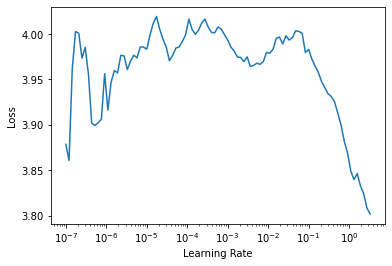

In [12]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(5, 0.01)

In [ ]:
learn.model

находим самые высокооцененные

In [ ]:
item_bias = learn.model.i_bias.weight.squeeze()
idxs = item_bias.argsort(descending=True)[:5]
[dls.classes['item'][i] for i in idxs]

находим ближайшего похожего

In [ ]:
item_factors = learn.model.i_weight.weight
idx = dls.classes['item'].o2i['22208']
distances = nn.CosineSimilarity(dim=1)(item_factors, item_factors[idx][None])
idx = distances.argsort(descending=True)[:1]
dls.classes['item'][idx]

Посмотрим на предсказания

In [ ]:
(users, items), ratings = next(iter(data.valid_dl))
preds = learn.model(users, items)
print('Real\tPred\tDifference')
for p in list(zop(ratings, preds))[16]:
    print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))